In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
BASE_PATH = f'./images2/'
trainDir = os.path.join(BASE_PATH, 'Train/')
testDir = os.path.join(BASE_PATH, 'test/')

In [ ]:
# Avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, TRUE)

In [ ]:
def clean_images(path):
    i = 0
    for imgClass in os.listdir(path):
        if imgClass == '.DS_Store':
            continue
        for img in os.listdir(os.path.join(path, imgClass)):
            imgPath = os.path.join(path, imgClass, img)
            try:
                img = cv2.imread(imgPath)
                print(img.shape)
            except Exception as e:
                print(f'Image: {imgClass} has an issue.')
# clean_images(trainDir)
# clean_images(testDir)

In [ ]:
class_name = [
    'character_1_ka',
    'character_2_kha',
    'character_3_ga',
    'character_4_gha',
    'character_5_kna',
    'character_6_cha',
    'character_7_chha',
    'character_8_ja',
    'character_9_jha',
    'character_10_yna',
     'character_11_taamatar',
     'character_12_thaa',
     'character_13_daa',
     'character_14_dhaa',
     'character_15_adna',
     'character_16_tabala',
     'character_17_tha',
     'character_18_da',
     'character_19_dha',
     'character_20_na',
     'character_21_pa',
     'character_22_pha',
     'character_23_ba',
     'character_24_bha',
     'character_25_ma',
     'character_26_yaw',
     'character_27_ra',
     'character_28_la',
     'character_29_waw',
     'character_30_motosaw',
     'character_31_petchiryakha',
     'character_32_patalosaw',
     'character_33_ha',
     'character_34_chhya',
     'character_35_tra',
     'character_36_gya',
     'digit_0',
     'digit_1',
     'digit_2',
     'digit_3',
     'digit_4',
     'digit_5',
     'digit_6',
     'digit_7',
     'digit_8',
     'digit_9',
    ]

In [ ]:
# LOAD DATA
# trainData = tf.keras.utils.image_dataset_from_directory(
#     trainDir,
#     labels = 'inferred',
#     label_mode = 'categorical',
#     batch_size = 32,
#     image_size = (32, 32),
#     shuffle=True,
#     color_mode='grayscale',
# )
# testData = tf.keras.utils.image_dataset_from_directory(
#     testDir,
#     labels = 'inferred',
#     label_mode = 'categorical',
#     batch_size = 32,
#     image_size = (32, 32),
#     shuffle=True,
#     color_mode='grayscale',
# )

data = tf.keras.utils.image_dataset_from_directory(
    BASE_PATH,
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 16,
    image_size = (127, 127),
    shuffle=True,
    color_mode='grayscale',
)
class_names = data.class_names

Found 19848 files belonging to 13 classes.


In [ ]:
# print(trainData.class_names)
print(data.class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ba', 'cha', 'pa']


In [ ]:
# trainBatches = trainData.as_numpy_iterator()
# testBatches = testData.as_numpy_iterator()

# im, la = next(trainBatches)
# la

data_iterator = data.as_numpy_iterator()

In [ ]:
# get another batch from iterator
# trainBatch = trainBatches.next()
# testBatch = testBatches.next()

batch = data_iterator.next()

In [ ]:
# trainBatch[1]
batch[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)

In [ ]:
# visualize_batch(trainBatch)

In [ ]:
# pre-processing data

In [ ]:
# scale data
# trainData = trainData.map(lambda x, y: (x/255, y))
# testData = testData.map(lambda x, y: (x/255, y))

data = data.map(lambda x, y: (x/255, y))

In [ ]:
# trainBatches = trainData.as_numpy_iterator()
# testBatches = testData.as_numpy_iterator()
data_iterator = data.as_numpy_iterator()

In [ ]:
# trainBatch = trainBatches.next()
# testBatch = testBatches.next()
batch = data_iterator.next()

In [ ]:
trainBatch[0].max()

1.0

In [ ]:
testBatch[0].shape

(32, 32, 32, 1)

In [ ]:
# len(trainData)
len(data)

1241

In [ ]:
# val_size = int( len(trainData) * 0.1 )
# train_size = int( len(trainData) * 0.9 )
# test_size = int( len(testData) )

val_size = int( len(data) * 0.2 ) +1
train_size = int( len(data) * 0.7 )
test_size = int( len(data) * 0.1) + 1

In [ ]:
# valData = trainData.take(val_size)
# trainData = trainData.skip(val_size).take(train_size)
# testData = testData.take(test_size)

valData = data.take(val_size)
trainData = data.skip(val_size).take(train_size)
testData = data.take(test_size)

In [ ]:
val_size + train_size + test_size


1242

In [ ]:
# Deep Learning Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (127, 127, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_153 (Conv2D)         (None, 125, 125, 32)      320       
                                                                 
 conv2d_154 (Conv2D)         (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 dropout_82 (Dropout)        (None, 61, 61, 32)        0         
                                                                 
 conv2d_155 (Conv2D)         (None, 59, 59, 64)        18496     
                                                                 
 conv2d_156 (Conv2D)         (None, 57, 57, 64)        36928     
                                                     

In [ ]:
logdir = './logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(
    trainData,
    epochs = 1,
    validation_data = valData,
    workers = 4,
    verbose = 1,
    callbacks = [tensorboard_callback]
)

674/868 [======================>.......] - ETA: 29s - loss: 0.2130 - accuracy: 0.9344

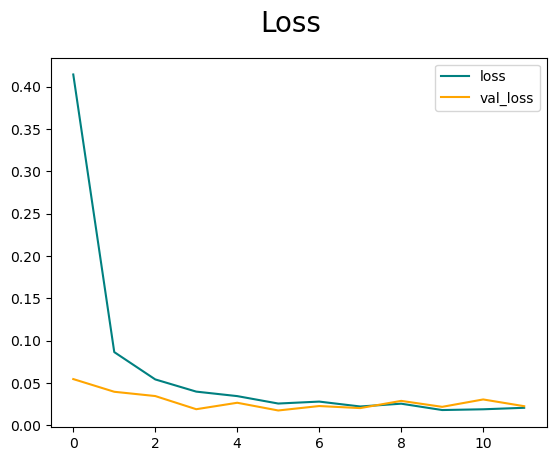

In [ ]:
# plot performance

# loss
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

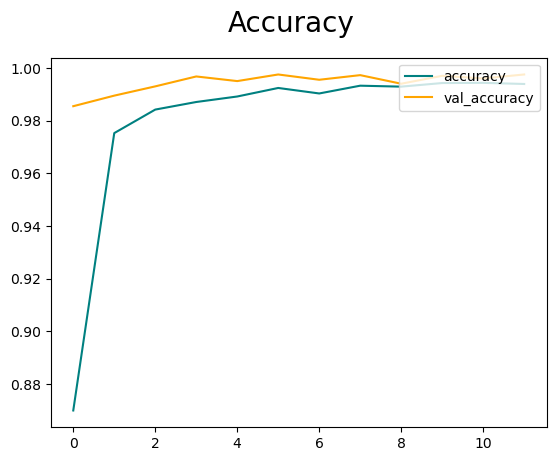

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Evaluate Performance
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in testData.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 10ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9646739363670349, Recall: 0.9244791865348816, Accuracy: 0.9915865659713745


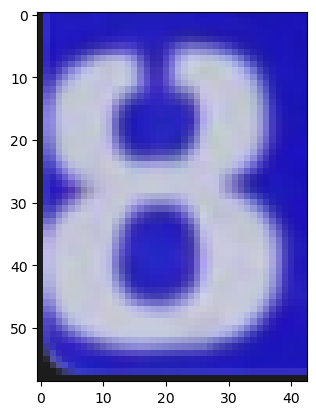

In [ ]:
# Test on outside Data \
img = cv2.imread('./test_pic_2.png')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
resize = cv2.resize(img, (127, 127))
resize.shape = (127, 127, 1)


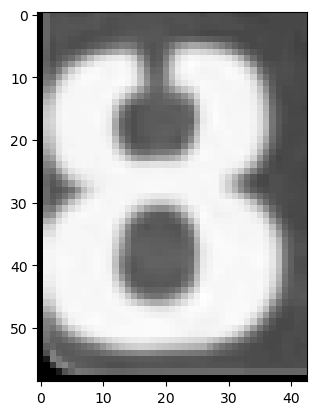

In [ ]:
plt.imshow(img, cmap='Greys_r')

In [ ]:
# classes = trainData.class_names
# classes = trainData.class_names


In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [ ]:
x = np.argmax(yhat)
prediction = class_names[x]
prediction

'4'

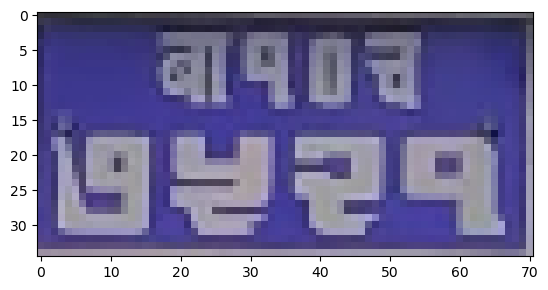

In [ ]:
img = cv2.imread('./test_pic.png')
plt.imshow(img)

In [ ]:
prediction

'4'

In [ ]:
filename = './test_pic.png'

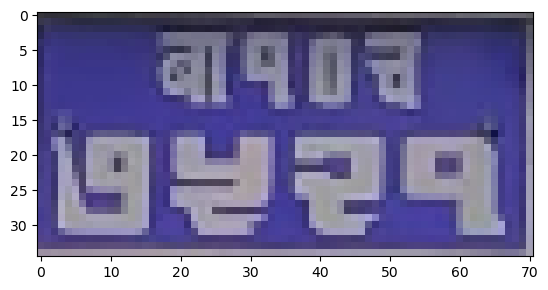

In [ ]:
img = cv2.imread('./test_pic.png')
plt.imshow(img)

In [ ]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5, 5),0)
# thresh_inv = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,10)
_, thresh_inv = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
edges = auto_canny(thresh_inv)

In [ ]:
ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
img_area = img.shape[0]*img.shape[1]

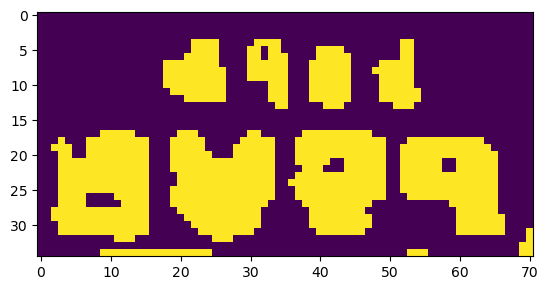

In [ ]:
plt.imshow(img)
plt.imshow(gray)
plt.imshow(thresh_inv)
# plt.imshow(edges)
# cv2.drawContours(img, sorted_ctrs, -1, (0,255,0), 3)
# plt.imshow(img)

[32, 51, 288, 87, 576, 152, 192, 884]

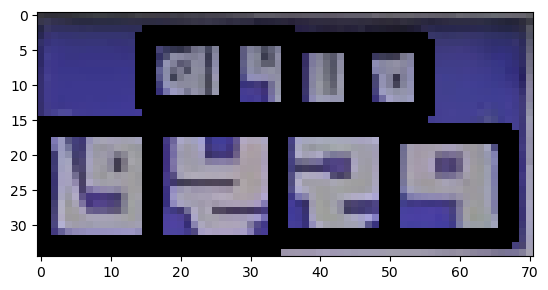

In [ ]:
all = []
rois = []
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
    if((roi_ratio >= 0.015) and (roi_ratio < 0.15)):
        if ((h>0.6*w) and (2*w>=h)):# and (h > 10):
            all.append(x*y)
            rois.append(img[y:y+h, x:x+w])
            x1 = cv2.rectangle(img,(x-2,y),( x + w, y + h),(0,0,0),2)

plt.imshow(img)
img = cv2.imread('./test_pic.png')
all

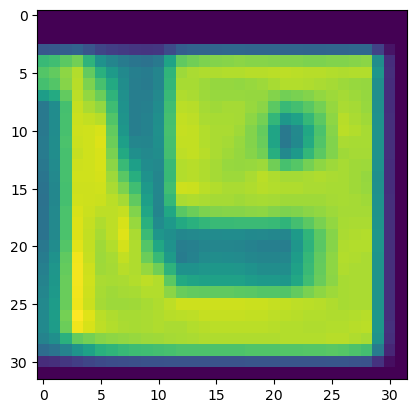

1/1 [==============================] - 0s 9ms/step
7


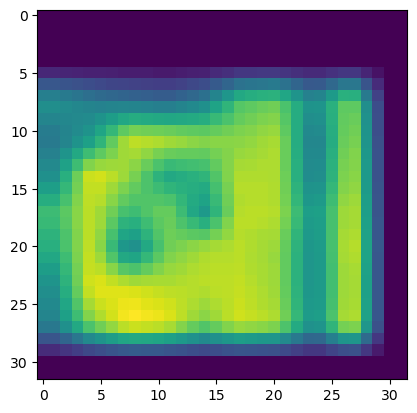

1/1 [==============================] - 0s 8ms/step
ba


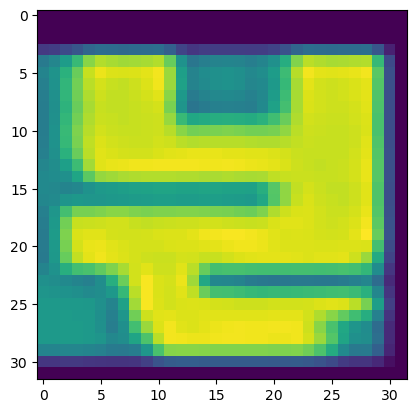

1/1 [==============================] - 0s 9ms/step
7


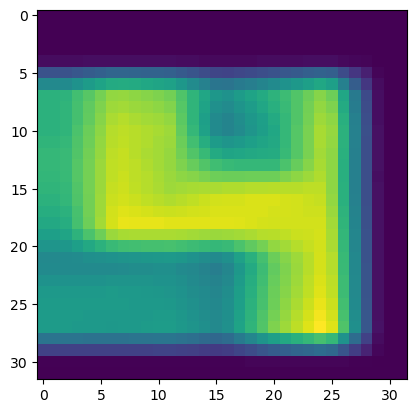

1/1 [==============================] - 0s 8ms/step
ba


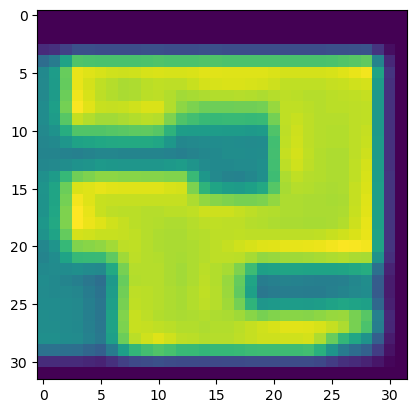

1/1 [==============================] - 0s 8ms/step
ba


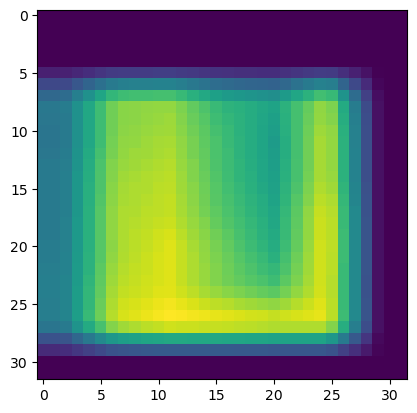

1/1 [==============================] - 0s 8ms/step
ba


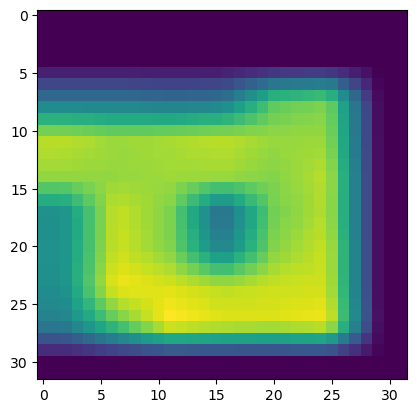

1/1 [==============================] - 0s 9ms/step
ba


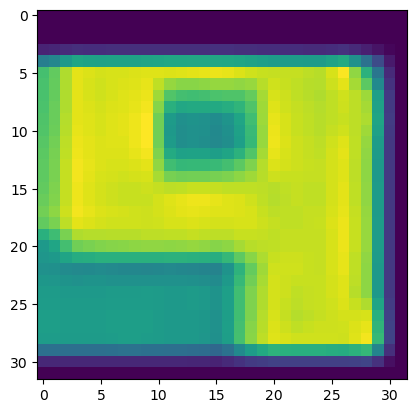

1/1 [==============================] - 0s 8ms/step
ba


In [ ]:
str = ''
plt.imshow(img)
img = cv2.imread('./test_pic.png')
for roi in rois:
    blackAndWhiteChar= cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blackAndWhiteChar = cv2.resize(blackAndWhiteChar,(32,32))
    plt.imshow(blackAndWhiteChar)
    plt.show()
    image = blackAndWhiteChar.reshape((1, 32,32, 1))
    image = image / 255.0
    y1 = model.predict(image)
    print(class_names[np.argmax(y1)])
    str = str + class_names[np.argmax(y1)] + ' '

In [ ]:
blackAndWhiteChar= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blackAndWhiteChar = cv2.resize(blackAndWhiteChar,(32,32))
all

[32, 51, 288, 87, 576, 152, 192, 884]

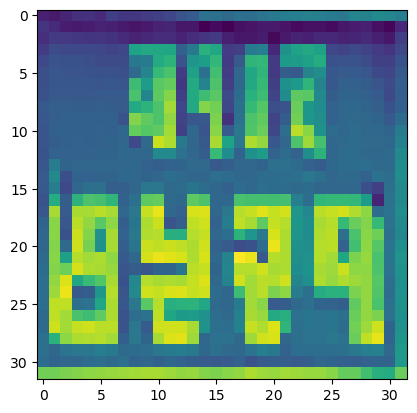

In [ ]:
plt.imshow(blackAndWhiteChar)
image = blackAndWhiteChar.reshape((1, 32,32, 1))
image = image/255.5

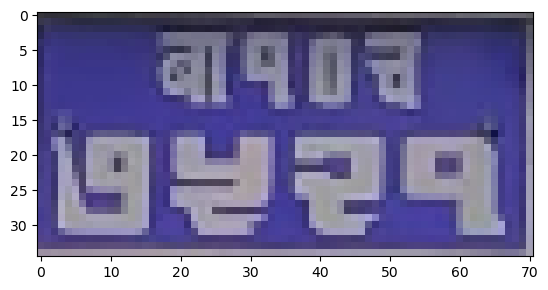

In [ ]:
plt.imshow(img)